# **WATER QUALITY EXPLANATORY DATA ANALYSIS**
---


## **What to expect from this project?**

*   Data Wrangling and Preprocessing (Profiling, Cleaning, Reduction and Transformation)
*   Multivariate Exploratory Data Analysis
*   Geospatial (Regional) Analysis
        [Based on water quality and population; List of regional priorities on improving water potability]
*   Reccomendations for improving data collection



## **Context**

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

Drinking water and staying hydrated is associated with a reduced incidence of urinary tract infections (UTIs), lower blood pressure and heart disease. Therefore, drinking water is essential for good heart health.

Water is the most important nutrient for the body. It has many benefits for your health and helps to protect you from illness and disease. Water is also an essential part of a healthy lifestyle.

## **Table of Contents**

> 1.   **Preparation**
>>1.1   Python Libraries |
>>1.2   The Dataframe
> 2.   **Quality Check and Normalisation**
>>2.1   Missing Values |
>>2.2   Dataframe Reduction |
>>2.3   Columns Transformation |
>>2.4   Filling Data Gaps |
>>2.5   Considerations
> 3.   **Exploration**
>>3.1   Summary Statistics |
>>3.2   Data Distribution |
>>3.3   Correlation Analysis
> 4.   **Regional Analysis**
>>4.1   Geospatial Autocorrelation |
>>4.2   Low-flow Conditions
> 5.   **Conclusion**
> 6.   **References**

# **1.0 Preparation**
---



### 1.1 Python Libraries

In [1]:
# Installing any packages not pre-existing in this platform.

!pip install geopandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.0 MB/s 
     |████████████████████████████████| 16.6 MB 122 kB/s 
     |████████████████████████████████| 7.8 MB 28.2 MB/s 


In [2]:
# This notebook was created in a Google Colab notebook running Python with a handful of pre-installed libraries

import numpy as np # linear algebra
import pandas as pd # read csv file as a dataframe and wrangle the data
import missingno as msno # identify and visualise missing data
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns # data visualisation
import plotly.express as px # data visualisation
import panel as pn
import geopandas as gpd # to create spatial data

### 1.2 The Dataframe

In [3]:
# Importing, reading a csv file as a Pandas DataFrame and initially assigning it to a variable called 'RawDataframe'

RawDataframe = pd.read_csv('/content/Hydrowaste.csv') 
RawDataframe # Print() is not required to generate outputs in Google Colab notebooks

,WASTE_ID,SOURCE,ORG_ID,WWTP_NAME,COUNTRY,CNTRY_ISO,LATITUDE,LONGITUDE,QUAL_LOC,LAT_OUT,...,QUAL_WASTE,LEVEL,QUAL_LEVEL,DF,HYRIV_ID,RIVER_DIS,COAST_10KM,COAST_50KM,DESIGN_CAP,QUAL_CAP
0,2248,1,1279514,Strzyzow,Ukraine,UKR,50.841,24.031,2,50.840,...,1,Secondary,1,3.618801e+07,20352809,40.163,0,0,2500.0,2
1,56448,12,3598,NaN,Ukraine,UKR,44.396,33.977,1,44.390,...,4,Secondary,2,NaN,20516712,NaN,1,1,NaN,3
2,56449,12,3599,NaN,Ukraine,UKR,44.410,34.021,1,44.390,...,4,Secondary,2,NaN,20516712,NaN,1,1,NaN,3
3,56450,12,3600,NaN,Ukraine,UKR,44.440,33.724,1,44.494,...,4,Secondary,2,1.198600e+02,20514644,2.856,0,1,NaN,3
4,56452,12,3602,NaN,Ukraine,UKR,44.477,33.789,1,44.494,...,4,Secondary,2,1.019200e+02,20514644,2.856,0,1,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,56983,12,4133,NaN,Ukraine,UKR,51.464,23.973,1,51.452,...,4,Secondary,2,1.731160e+02,20336946,1.341,0,0,NaN,3
308,56987,12,4137,NaN,Ukraine,UKR,51.512,30.665,1,51.465,...,4,Secondary,2,1.627144e+04,20336870,554.698,0,1,NaN,3
309,56993,12,4143,NaN,Ukraine,UKR,51.569,32.944,1,51.594,...,4,Secondary,2,2.098007e+04,20334021,178.919,0,0,NaN,3
310,57030,12,4180,NaN,Ukraine,UKR,51.826,26.124,1,51.831,...,4,Secondary,2,3.791562e+03,20327161,53.894,0,0,NaN,3


# **2.0 Quality Check and Normalisation**
---



### 2.1 Missing Values

I'll start by diagnosing the dataframe, identifying and mapping the relationships between missing values to define a data cleaning strategy.

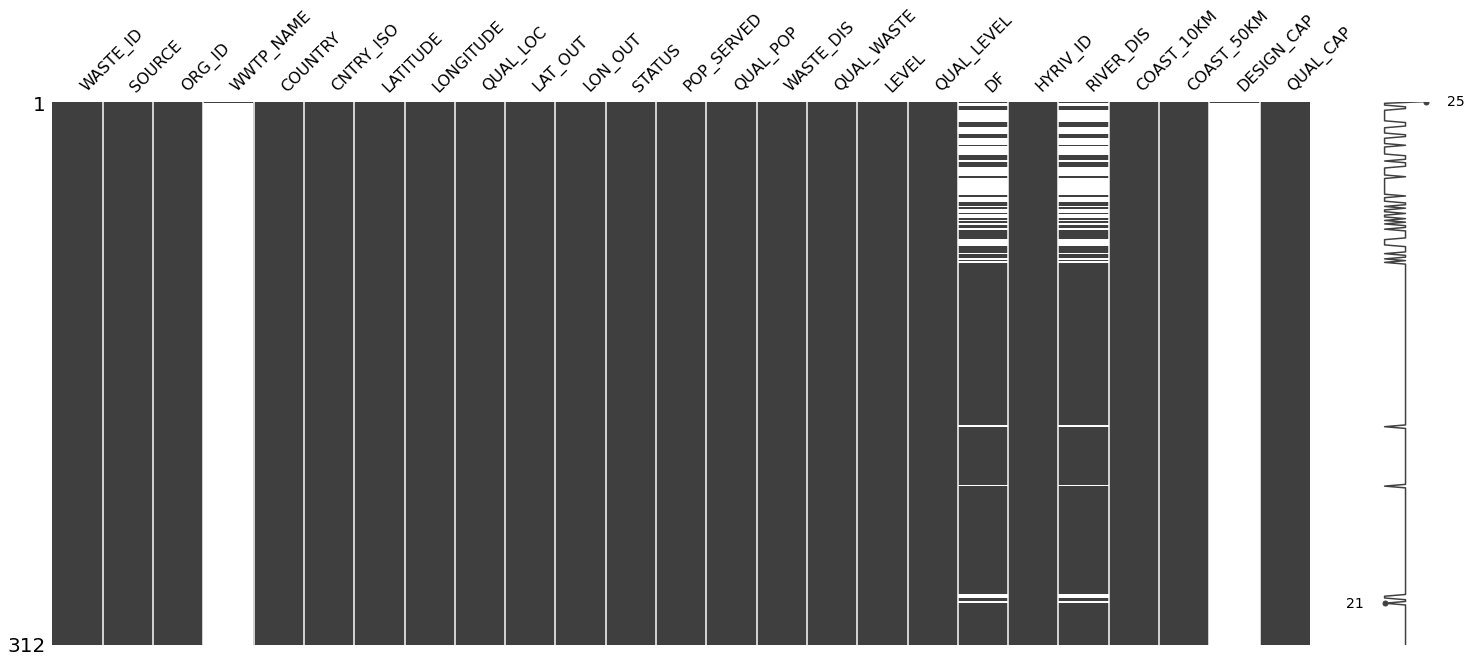

In [4]:
# MATRIX PLOT (Visualising the distribution of missing data)
# When data is present, the plot is shaded in grey, and when it is absent the plot is displayed in white.
msno.matrix(RawDataframe)

COMMENT OF RESULTS:
>*   There is no data in the WWTP_NAME and DESIGN_CAP columns, making it necessary to completely remove them from the dataframe.
>*   A direct correlation between the missing values in the DF and RIVER_DIS columns can be easily seen in this image. This would require a deeper analysis to possibly fill in the gaps. 



### 2.2 Dataframe Reduction

In [5]:
# COLUMNS
Dataframe = RawDataframe.drop([
    'WWTP_NAME', 'DESIGN_CAP', # Columns missing over 95% of its data
    'SOURCE', 'COUNTRY', 'CNTRY_ISO', 'STATUS', 'LEVEL', # Columns containing 1 unique value
    'QUAL_LOC', 'QUAL_POP', 'QUAL_WASTE', 'QUAL_LEVEL', 'QUAL_CAP', # Quality check columns not relevant for this analysis
    'ORG_ID', 'HYRIV_ID' # Other non-relevant columns
                                    ], axis=1)

# ROW
# I noticed that the first row [0] countained records from the WWTP Strzyzow (WASTE ID 2248)
## which is actually located in east Poland, +70km away from the Poland-Ukraine border.
Dataframe = Dataframe.drop(0)

Dataframe.head(1)

,WASTE_ID,LATITUDE,LONGITUDE,LAT_OUT,LON_OUT,POP_SERVED,WASTE_DIS,DF,RIVER_DIS,COAST_10KM,COAST_50KM
1,56448,44.396,33.977,44.39,33.96,22412,1865.016,NaN,NaN,1,1


### 2.3 Columns Transformation

The COAST_10KM and COAST_50KM columns follow a Boolean methodology to estimate the proximity of WWTPs to their outfall areas, which can be the ocean or large lakes. In such a methodology, values of 0 represent False and values of 1 represent True for claims that a particular WWTP is within the stated distance (see the image below for better understanding). So to bring a more high-level language, the logic values of the two columns will be combined to form a categorical group of distances in string format that is very easy to understand by all types of audiences.

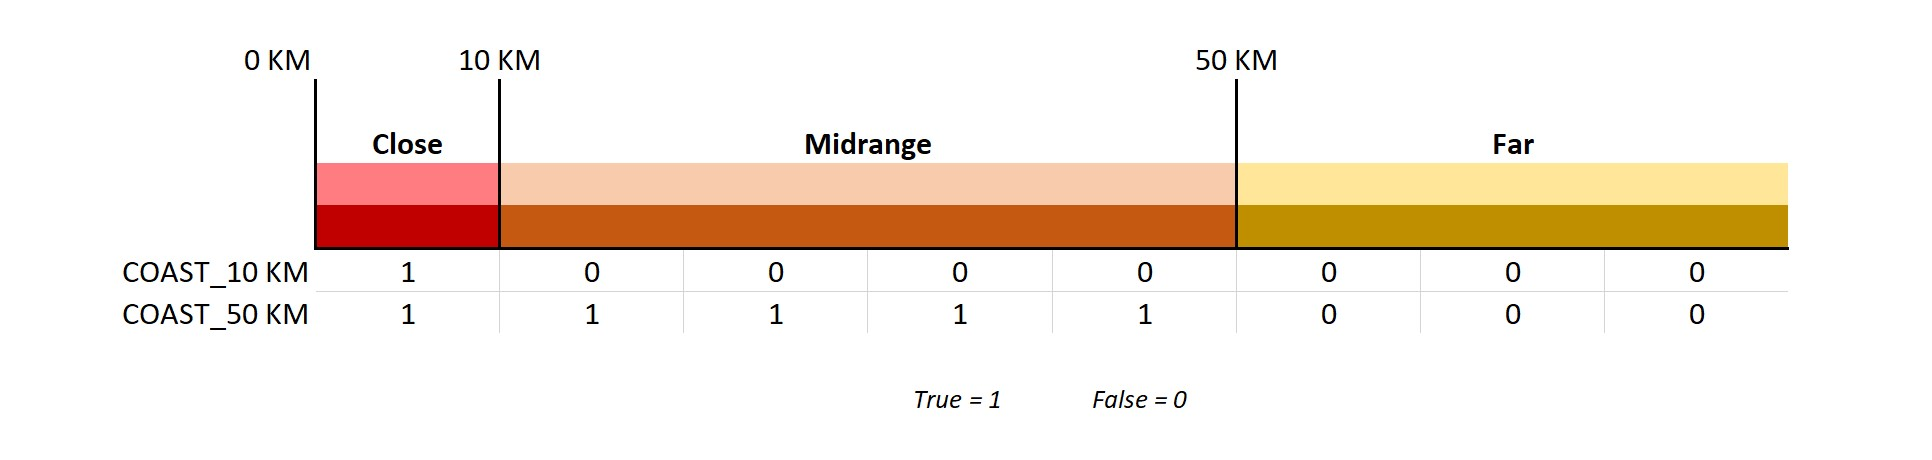

In [6]:
# Creating the conditions
conditions = [
    (Dataframe['COAST_10KM'] == 0) & (Dataframe['COAST_50KM'] == 0), # Far
    (Dataframe['COAST_10KM'] == 0) & (Dataframe['COAST_50KM'] == 1), # Midrange
    (Dataframe['COAST_10KM'] == 1) & (Dataframe['COAST_50KM'] == 1), # Close
    (Dataframe['COAST_10KM'] == 1) & (Dataframe['COAST_50KM'] == 0), # Error (if existent)
             ]

# Creating the category names
values = ['Far', 'Midrange', 'Close', 'Error']

# Assembling them into a new column
Dataframe['OUTFALL_DISTANCE'] = np.select(conditions, values)

# Deleting these two columns because they are not necessary anymore.
Dataframe = Dataframe.drop(['COAST_10KM', 'COAST_50KM'], axis=1)

### 2.4 Filling Data Gaps

This part is a bit riskier, as although many documentations suggest filtering out records containing missing data to avoid biased analysis, I want my data frame to be inclusive and allow all regions and localities a chance to be analysed.

For this reason, I am referring to the scientific study by Ehalt Macedo, et al. (2022) which determines the values for the dilution factor (DF) and river discharge (RIVER_DIS) as infinite for WWTPs where the outfall location ranges within 10 km and coincides with the ocean or a large lake. Therefore, since there is no meaningful value for direct discharges, the NaN values in the data frame will be replaced by 0.

In [7]:
# Replacing null values directly in the main dataframe
Dataframe.fillna(0,inplace=True)

# Visualising the output to see if changes were sucessfull by merging the 2 dataframes and getting the top rows
OldNewMerged = RawDataframe.merge(Dataframe,on='WASTE_ID')

OldNewMerged[['WASTE_ID', 'DF_x', 'RIVER_DIS_x', # Raw Dataframe
                          'DF_y', 'RIVER_DIS_y'  # Cleaned Dataframe
            ]].head(3) 

,WASTE_ID,DF_x,RIVER_DIS_x,DF_y,RIVER_DIS_y
0,56448,NaN,NaN,0.00,0.000
1,56449,NaN,NaN,0.00,0.000
2,56450,119.86,2.856,119.86,2.856


### 2.5 Renamed Columns

In [8]:
Dataframe.rename(columns={
    'WASTE_ID': 'WWTP_ID', # ID of each wastewater treatment plant (WWTP).
    'POP_SERVED': 'POPULATION_SERVED', # Size of the population served by the WWTP.
    'DF': 'DILUTION_FACTOR', # Estimated dilution factor.
    'WASTE_DIS' : 'WASTEWATER_DISCHARGED', # Treated wastewater discharged by the WWTP in m3.
    'RIVER_DIS' : 'RIVER_DISCHARGED', # Estimated the volume of water flowing through a river channel at the WWTP outfall location in m3.
    'LATITUDE': 'LATITUDE_WWTP', # Latitude of reported WWTP location.
    'LONGITUDE': 'LONGITUDE_WWTP', # Longitude of reported WWTP location.
    'LAT_OUT': 'LATITUDE_OUTFALL', # Latitude of the estimated outfall location.
    'LON_OUT': 'LONGITUDE_OUTFALL' # Longitude of the estimated outfall location.
                         }, inplace=True)

Dataframe.head(1)

,WWTP_ID,LATITUDE_WWTP,LONGITUDE_WWTP,LATITUDE_OUTFALL,LONGITUDE_OUTFALL,POPULATION_SERVED,WASTEWATER_DISCHARGED,DILUTION_FACTOR,RIVER_DISCHARGED,OUTFALL_DISTANCE
1,56448,44.396,33.977,44.39,33.96,22412,1865.016,0.0,0.0,Close


### 2.6 Considerations

1.   The majority of the values recorded in the ***rawdf*** dataframe 
1 = Reported as ‘treated’ by national/regional dataset; 2 = Reported as ‘design capacity’ by national/regional dataset; 3 = Reported but type not identified; 4 = Estimated

2.   The lack of accurate categorical data on the **STATUS** **of activities of WWTPs** could increase the risk of biased analysis results, since there is no way to effectively determine which ones are *operational*, *under construction*, *temporarily deactivated*, or *decommissioned*, and thus leaving only the assumption of operability to all of them. These WWTPs might have been included in this dataset for their potential as a source of residues in river sediments from former discharges.

3.   There is no data on the **names of the WWTPs** and their **projected capacities**, which makes it more difficult to make adequate identifications as well as bivariate correlations with the size of their served populations.

5.   The dataframe includes reports on WWTPs located in Crimea (LATITUDE_WWTP below 46 and LONGITUDE_WWTP above 32). Thereupon, periodic reviews must consider current geopolitical scenarios in deciding whether to keep them in the dataframe, as data on such WWTPs have increased risk of being biased.

Factors you think are required to more accurately measure water portability

# **3.0 Exploration**
---




### 3.1 Summary Statistics

In [9]:
# Assigning a variable containing only statistical columns for further analyses.
StatsDataframe = Dataframe[["POPULATION_SERVED", "WASTEWATER_DISCHARGED", "DILUTION_FACTOR", "RIVER_DISCHARGED", "OUTFALL_DISTANCE"]]

# Retrieving a complete statistics summary for integers, floats and strings. 
StatsDataframe.describe(include="all")

,POPULATION_SERVED,WASTEWATER_DISCHARGED,DILUTION_FACTOR,RIVER_DISCHARGED,OUTFALL_DISTANCE
count,311.000000,311.000000,311.000000,311.000000,311
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Far
freq,NaN,NaN,NaN,NaN,195
mean,59168.080386,4923.705228,14673.378006,136.744138,NaN
std,99391.703164,8270.943694,77516.075198,629.542315,NaN
min,86.000000,7.143000,0.000000,0.000000,NaN
25%,9743.500000,810.850000,6.668000,0.222500,NaN
50%,23622.000000,1965.698000,96.381000,2.208000,NaN
75%,62778.000000,5224.089000,598.203500,13.626000,NaN


COMMENT ON RESULTS:
>*   OUTFALL_DISTANCE has only 3 unique values, thus confirming that there are no errors with the boolean calculations contained in the column.
>*   ...







### 3.2 Data Distribution

In [10]:
# [YES]

px.histogram(StatsDataframe, x= 'POPULATION_SERVED', color= 'OUTFALL_DISTANCE')

In [11]:
px.histogram(StatsDataframe, x= 'WASTEWATER_DISCHARGED', color= 'OUTFALL_DISTANCE')

In [12]:
px.histogram(StatsDataframe, x= 'DILUTION_FACTOR', color= 'OUTFALL_DISTANCE')

In [13]:
px.histogram(StatsDataframe, x= 'RIVER_DISCHARGED', color= 'OUTFALL_DISTANCE')

### 3.3 Correlation Analysis

<ipython-input-14-430f87f39b11>:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



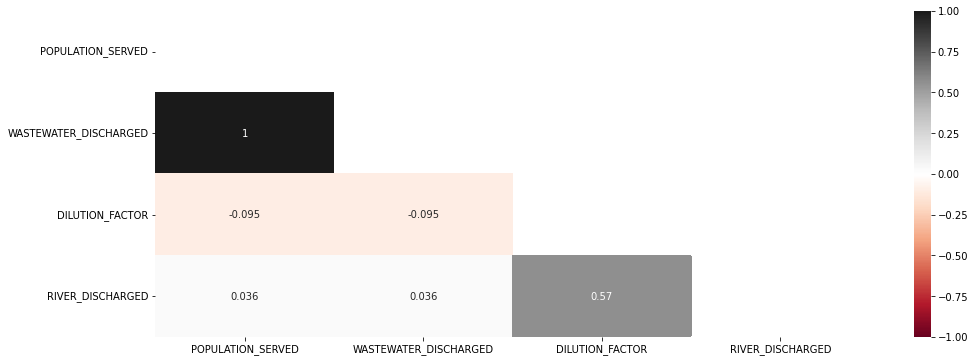

In [14]:
# Setting the size and ration of the visual
plt.figure(figsize= (16, 6))

# Generating a mask for the upper triangle
mask= np.triu(np.ones_like(StatsDataframe.corr(), dtype= np.bool))

# Setting the visual with a range of values to be displayed on the colormap from -1 to 1,
## and set the annotation to True to display the correlation values on the heatmap.
heatmap= sns.heatmap(StatsDataframe.corr(), mask= mask, vmin= -1, vmax= 1, annot= True, cmap= 'RdGy')

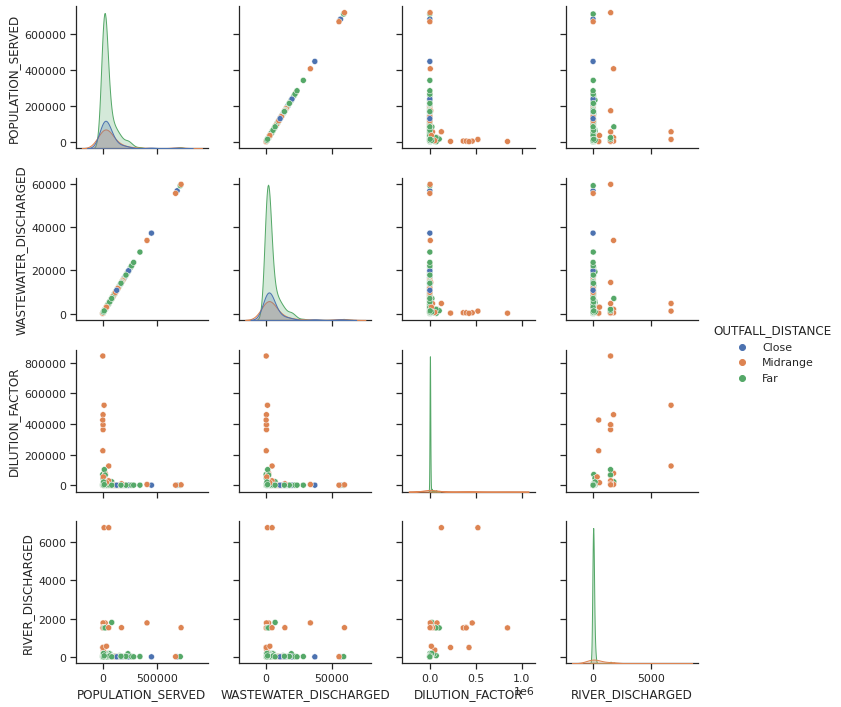

In [15]:
sns.set_theme(style="ticks")

sns.pairplot(StatsDataframe, hue="OUTFALL_DISTANCE")

COMMENT ON RESULTS:
>*   ...
>*   ...







# **4.0 Regional Analysis**
---




### 4.1 Spatial Autocorrelation

### 4.2 Low-flow Conditions

# **5.0 Conclusion**
---




1.   Idea 1
2.   Idea 2

# **6.0 References**
---




*   Ehalt Macedo, H., Lehner, B., Nicell, J., Grill, G., Li, J., Limtong, A., and Shakya, R.: Distribution and characteristics of wastewater treatment plants within the global river network, Earth Syst. Sci. Data, 14, 559–577, https://doi.org/10.5194/essd-14-559-2022, 2022.

# **NOTES**
---



### **Cool Usable Codes**



*   ***Seaborn Pair Plot with Hue*** (Multivariate Analysis; Multi plot charts)
        sns.pairplot (data = dataframe, hue = 'column1')
*   ***NumPy Filling Null Values*** (Replace missing data in the dataframe)
        df = df.fillna(0) # Or whatever the string or data type you want
        df['gdp_per_capita'] = np.where(df['column1']!=, df['gdp'] / df['population'], 0] # creating a new column by dividing gdp per population
*   List item
        Insert code


### Links To Go Back Later

*   [Distribution and characteristics of wastewater treatment plants within the global river network](https://essd.copernicus.org/articles/14/559/2022/)
*   [Using the missingno Python library to Identify and Visualise Missing Data Prior to Machine Learning](https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009)
*   [Python Jupyter - Insight to Univariate and Multivariate Distribution Plots](https://www.youtube.com/watch?v=vssXHSLSGL4&ab_channel=NomanArshed)
*   [Univariate, Bivariate, and Multivariate Data Analysis in Python](https://medium.com/mlearning-ai/univariate-bivariate-and-multivariate-data-analysis-in-python-341493c3d173#:~:text=Multivariate%20analysis%20is%20a%20more,plot%2C%20with%20Hue%20as%20Approved.)
*   List item




